# Simple ARIMA forecasting example

This is a template notebook for a ARIMA analysis. [This](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) reference was used. ARIMA is good for forecasting where there is trend but not seasonality. Use SARIMA when seasons are present. Simple AR or MA when no trend is present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# If you open the file you see the first 12 lines are header lines
df = pd.read_excel('datasets/sales-of-shampoo-over-a-three-ye.xls', header = 12)

In [3]:
df['Month'] = '19' + df['Month'].apply(lambda x: str(x)[2:])
df.head()

,Month,Unnamed: 1
0,1901-01,266.0
1,1901-02,145.9
2,1901-03,183.1
3,1901-04,119.3
4,1901-05,180.3


In [4]:
timeseries = df.set_index('Month')
timeseries.columns = ['sales_3years']
timeseries.head(20)

,sales_3years
Month,
1901-01,266.0
1901-02,145.9
1901-03,183.1
1901-04,119.3
1901-05,180.3
1901-06,168.5
1901-07,231.8
1901-08,224.5
1901-09,192.8


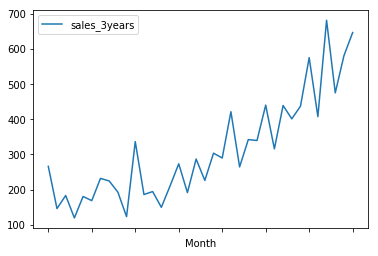

In [5]:
timeseries.plot()

In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(6).mean()
    rolstd = timeseries.rolling(6).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    
    #Perform Dickey-Fuller test:
    # Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. 
    # The null hypothesis is that the TS is non-stationary. 
    # The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
    # If the ‘Test Statistic’ is less than the ‘Critical Value’, 
    # we can reject the null hypothesis and say that the series is stationary.
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


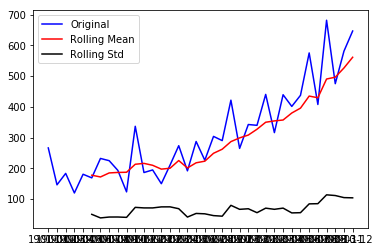

In [40]:
test_stationarity(timeseries)

In [6]:
from pandas.tools.plotting import autocorrelation_plot

/home/pedro/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


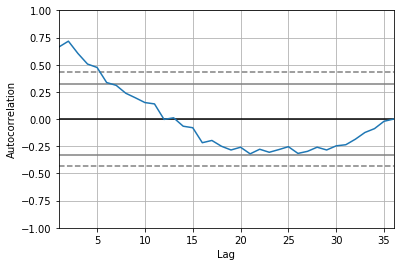

In [7]:
autocorrelation_plot(timeseries)

The above suggests a time-lag order of 5.

In [8]:
from statsmodels.tsa.arima_model import ARIMA

### Running the model

In [56]:
# order=(p,d,q); p is AR parameters 
# d is differences (non-zero when there is a trend)
#q is MA parameters (uses residuals)
model = ARIMA(timeseries, order=(5,1,0))  

/home/pedro/anaconda3/envs/insight/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/pedro/anaconda3/envs/insight/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.sales_3years   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sun, 25 Nov 2018   AIC                            406.340
Time:                        16:56:44   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.sales_3years    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.sale

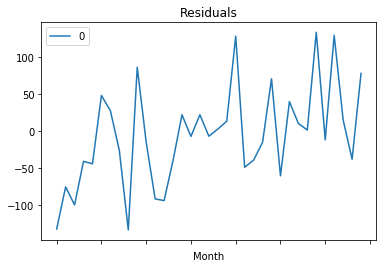

In [58]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Residuals')
plt.show()

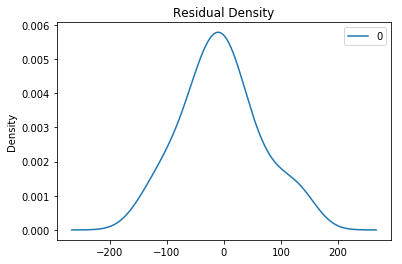

                0
count   35.000000
mean    -5.495189
std     68.132884
min   -133.296583
25%    -42.477916
50%     -7.186570
75%     24.748367
max    133.237999


In [59]:
residuals.plot(kind='kde')
plt.title('Residual Density')
plt.show()
print(residuals.describe())